# Ön Hazırlık LAB-2

#### Kütüphaneler vb.

In [8]:
import numpy as np                            #mat. fonksiyonlarını kullanabilmek için gereken kütüphane
from matplotlib import pyplot as plt          #plot (grafik çizdirme) fonksiyonlarını kullanmak için gereken kütüphane
from scipy import signal                      #convole() ve lfilter() kullanmak için
%matplotlib notebook
#grafikleri düzgün görüntülemek için gerekiyor.

from numpy import pi as pi                    #pi sayısını direkt pi olarak kullanmak için.
from numpy import sin as sin                  #sin sinyalini direkt sin olarak kullanmak için.
from numpy import cos as cos                  #cos sinyalini direkt cos olarak kullanmak için.
from numpy import exp as exp                  #e^ işaretini direkt e^ olarak kullanmak için.

import warnings
warnings.simplefilter("ignore", np.ComplexWarning) #complex sayı hatalarını almamak için **
#*** bu işlem sonuçları etkilememektedir.

## Ödev-2

### Soru_1
𝑦[𝑛]=𝑥[𝑛]−𝑥[𝑛−1] fark denklemiyle ifade edilen DZD bir sistem için aşağıda verilen soruları cevaplayınız.

a) Bu sistemin dürtü cevabını el yordamıyla bulunuz.

Sistemin dürtü cevabını bulmak için x[n]=𝛿[n] deriz.
Bu durumda sistemin çıktısı y[n]=h[n] şeklinde; yani dürtü cevabı olur.

Buradan hareketle y[n]=x[n]-x[n-1] sisteminde yukarıdaki değerlerimizi yerine koyarsak;
h[n]=𝛿[n]-𝛿[n-1] olarak dürtü cevabını bulmuş oluruz.


b) Bu sistem kararlı mıdır? Neden?

Kararlılık yapısını "BIBO Stability" çerçevesinde inceliyoruz.
Yani sistem, sınırlı girişe sınırlı çıkış üretiyorsa kararlıdır.
Burada sınırlandırma ölçütümüz genlik bazında olacaktır. Buradan hareketle;

Yukarıda bulduğumuz dürtü cevabını iki parçada göz önüne alır ve incelersek 
𝛿[n] parçası sadece n=0 da 1 genliğinde bir pulse üretecektir ve başka bir 
elemanı olmadığı için sınırlıdır.
aynı şekilde -𝛿[n-1] parçası n=1 anında negatif bir pulse üretecektir ve başka
bir komponenti olmadığı için 1 genliğinde sınırlıdır.

Buradan hareket ile bu sistem "kararlıdır" deriz.

Soru 1. c) şıkkı


<IPython.core.display.Javascript object>


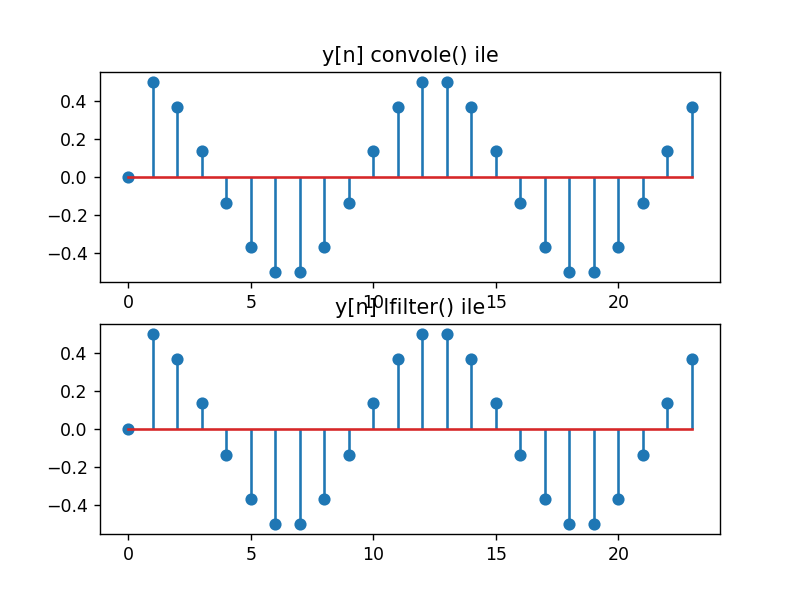

In [9]:
# c) Bu sistemin girişine 𝑥[𝑛]=sin(𝜋/6𝑛) işaretini uygulayın. ... 

# Sisteme baktığımızda y[n] = x[n]*h[n] olacaktır ve burada '*'
# işareti konvolüsyon anlamına gelmektedir.

n=np.arange(0,24);                # n domainimizi oluşturduk.
h=np.array([1,-1],dtype=float);   
x=np.zeros(len(n),dtype=float);


for i in range (len(n)):          # iki periyot olacak şekilde x işaretimizi çizdirdik.
    x[i]= sin(pi*i/6);            # sinyalimizin periyodunu N=12 bulduk.
    
y_convoled=np.convolve(x,h,'same');#convolve() komutu ile sistem çıktımızı bulduk

b=[1,-1];                          # giriş değerleri
a=[1];                             # çıkış değerleri
y_filtered=signal.lfilter(b,a,x);  #lfilter() komutu ile sistem çıktımızı bulduk

print('Soru 1. c) şıkkı');
fig, axs = plt.subplots(2);             #subplot ile birden fazla grafik çizdirebiliriz.

axs[0].stem(n, y_convoled);
axs[0].set_title('y[n] convole() ile');
axs[1].stem(n, y_filtered);
axs[1].set_title('y[n] lfilter() ile');

plt.show();

### Soru_2
Sistem-1: 𝑦[𝑛]−1/2𝑦[𝑛−1]=𝑥[𝑛] ile Sistem-2: 𝑦[𝑛]−2𝑦[𝑛−1]=𝑥[𝑛] DZD sistemleri verilmektedir. Bu iki sistem için aşağıdaki soruları cevaplayın.



<IPython.core.display.Javascript object>


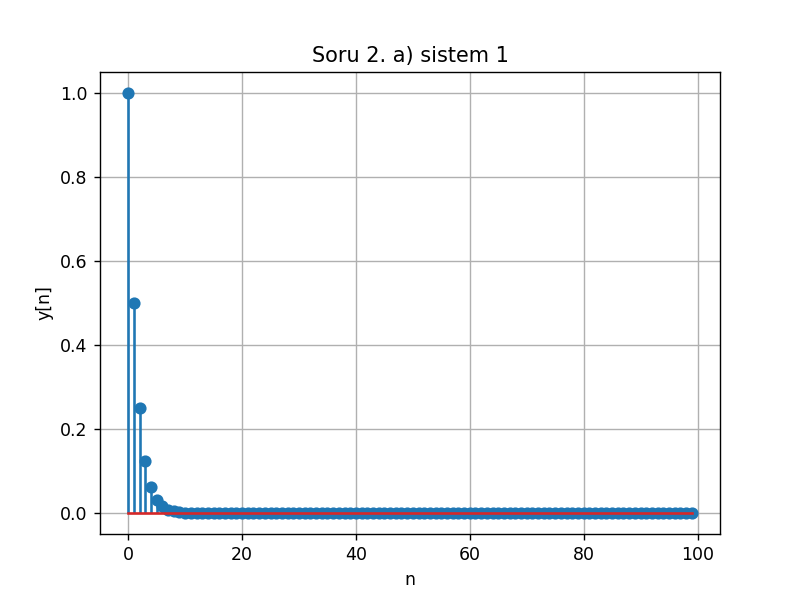

In [13]:
# a) Python’da 100 noktalı olacak şekilde dürtü işareti oluşturun ...

def u(n):                      # u[n]'i oluşturduk.    
    if n >= 0:
        return 1;
    else:
        return 0;

def dirac(n):                  # 𝛿[n]'i oluşturduk.
    if n == 0:
        return 1;
    else:
        return 0;
    
n=np.arange(0,100);             # n domainimizi 100 birim oluşturduk.
h=np.zeros(len(n),dtype=float); # h ve x işaretler için
x=np.zeros(len(n),dtype=float); # 100 birimlik yer ayırdık.
   
for i in range(len(n)):        # x işaretimizi doldurduk.
    x = u(i);

for i in range (len(n)):       # h işaretimizi doldurduk.                       
    h[i]=(1/2)*h[i-1] + dirac(i);

y=np.convolve(x,h,'same');     # konvolüsyon işlemi ile y[n]'i oluşturduk.

plt.figure(201); 
plt.stem(n,y,use_line_collection=True);
plt.grid();
plt.title('Soru 2. a) sistem 1');
plt.ylabel('y[n]');
plt.xlabel('n');
plt.show();

<IPython.core.display.Javascript object>


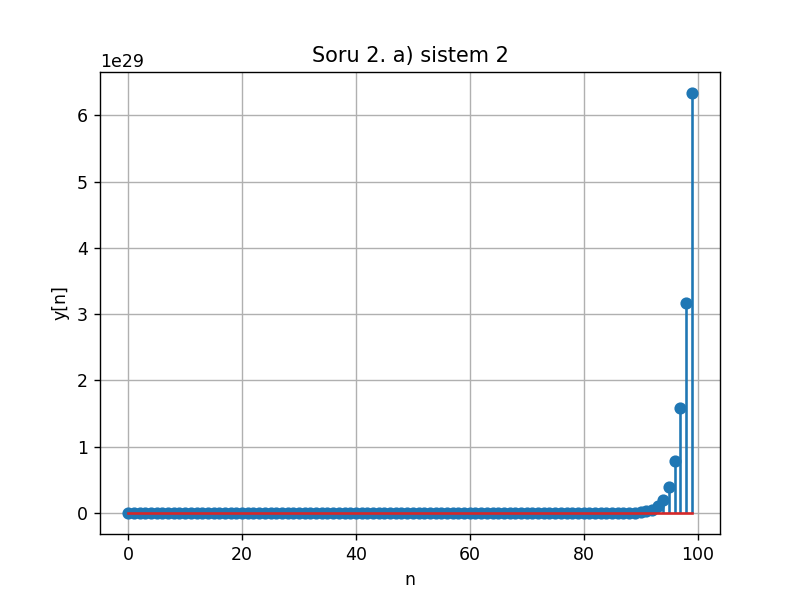

In [11]:

for i in range(len(n)): # x girişimizi 100 adet dürtü fonksiyonu olarak belirledik
    x = u(i)


for i in range (len(n)):       # el ile dürtü cevabını hesapladık  1. sorudaki gibi                    
    h[i]=(2)*h[i-1] + dirac(i);


y=np.convolve(x,h,'same');     # dürtü cevabımız ile x işaretimizi konvolüsyon toplamından yararlanarak y çıkışımızı bulduk                   
plt.figure(203);
plt.stem(n,y,use_line_collection=True);
plt.grid();
plt.title('Soru 2. a) sistem 2');
plt.ylabel('y[n]');
plt.xlabel('n');
plt.show();

b) a-şıkkında elde ettiğiniz grafiklere bakarak kararlılıkları ...

Grafiklere bakarak kararlılık hakkında bir yorumda bulunabiliriz.

Sistem 1 için yorumlayacak olursak, sistem 1 kararlıdır çünkü çıkış,
belli bir değerden başlayarak azalmaktadır ve hatta sıfıra gitmektedir.
Bu sistemin çıkışının kabaca 0 ve 1 arasında sınırlı olduğunu söyleyebiliriz.
Buradan hareketle sistem 1 kararlıdır.

Aynı şekilde Sistem 2 için kararlılığı ele alırsak bu sefer cevabımız
sistem 2 kararlı değildir olacaktır. Sistemin çıkışı kabaca 0 değerinden başlıyor
ve n değerine göre sürekli artıyor. Bu noktada son noktayı bilemeyeceğimizden
ve belki de çıkış sonsuza ıraksayacığından bu grafikten hareketle;
Sistem 2 kararsızdır deriz.


c) a-şıkkında elde ettiğiniz grafiklere bakarak nedensellikleri ...

sistemlerin nedensel olabilmesi için  n=<0 da h[n]=0 koşulunu sağlaması gerekmektedir.

Sistem 1 in cevabı h[n] = (1/2)*h[n-1]+𝛿[n] dir. Burada n=-3 verirsek h[n]=(1/2) * 0 + 0 =0 olur ve koşul sağlanır. Bu sebeple sistem 1 "nedensel"dir.

Sistem 2 in cevabı h[n] = (2)*h[n-1]+𝛿[n] dir. Burada n=-3 verirsek h[n]=2 * 0 + 0=0 olur ve koşul sağlannır.
Bu sebeple sistem 2 de "nedensel"dir.

### Soru_3
Aşağıdaki iki sisteme (a) ve (b) şıklarında verilen giriş işaretleri uygulandığında bu iki sistemin çıkışında elde edilecek işaretleri elde ediniz. Hem giriş işaretinin hem de çıkış işaretinin grafiklerini çizdiriniz.
Not: Toplam 4 çıkış işareti elde edeceksiniz. Her sonuç 10 puandır.
SİSTEM-1: ℎ[𝑛]=1/3(𝛿[𝑛+1]+𝛿[𝑛]+𝛿[𝑛−1])
SİSTEM-2: ℎ[𝑛]=𝛿[𝑛]−𝛿[𝑛−3])

In [143]:
# Bu soruda çıkışları yine convole() fonksiyonu kullanarak bulabiliriz.
# Öncelikle tüm sinyallerimizi oluşturalım ve çizimler için hazır hale gelelim.
# Sonrasında sırası ile x[n] işaretlerini 1. ve 2. sistemimize sokup çıkışlarına bakalım.

def u(n):                      # u[n]'i oluşturduk.    
    if n >= 0:
        return 1;
    else:
        return 0;
    
def dirac(n):                  # 𝛿[n]'i oluşturduk.
    if n == 0:
        return 1;
    else:
        return 0;
    

Soru 3. a) şıkkı


<IPython.core.display.Javascript object>


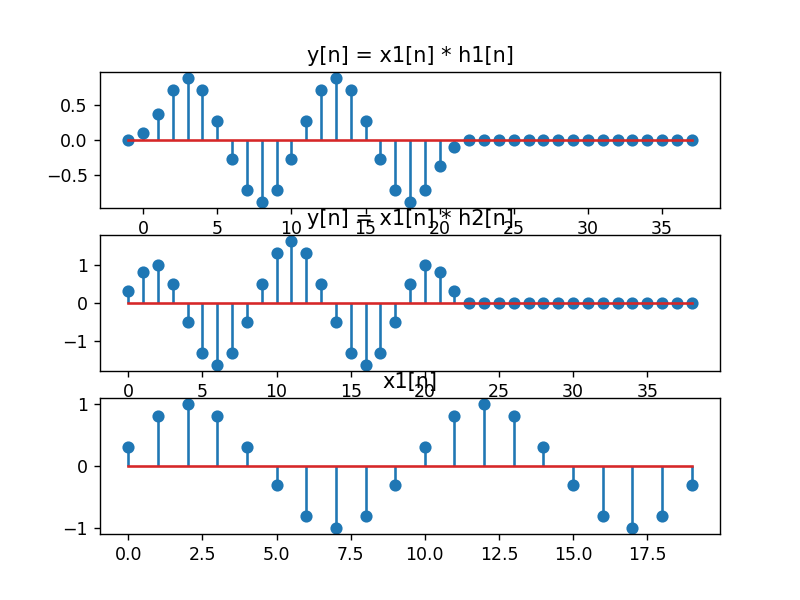

<IPython.core.display.Javascript object>


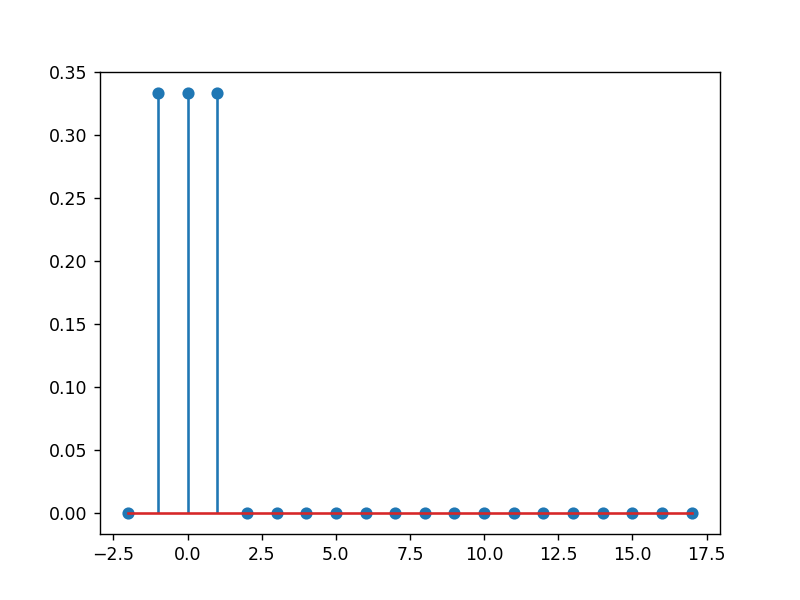

<StemContainer object of 3 artists>

In [135]:
# a) 

n=np.arange(-2,18);               # n domainimizi C birim oluşturduk.
h1=np.zeros(len(n),dtype=float); # h1 ve h2 işaretleri
h2=np.zeros(len(n),dtype=float); # için boş yer ayırdık.
x1=np.zeros(len(n),dtype=float); # için boş yer ayırdık.

for i in range (-1,len(n-1)):
    
    h2[i]= dirac(i)-dirac(i-3);                    # sistem 2 yi tanımladık.
    x1[i] = cos(pi*n[i]/5)*(u(i)-u(i-20));     # x1 girişini tanımladık.
    if 2>n[i]>-2:
        h1[i] = (1/3)*1; # sistem 1 i tanımladık. 
          
    
yA_1 = np.convolve(x1,h1);    # 𝑥1[𝑛]=cos(𝜋/5𝑛)(𝑢[𝑛]−𝑢[𝑛−20]) girişi için h1 sistemi:
yA_2 = np.convolve(x1,h2);    # 𝑥1[𝑛]=cos(𝜋/5𝑛)(𝑢[𝑛]−𝑢[𝑛−20]) girişi için h2 sistemi:

print('Soru 3. a) şıkkı');
fig, y1x = plt.subplots(3);          # subplot ile 2 grafiği birden çizdirdik.

y1x[0].stem(range(-1,19+19), yA_1);
#başlangıç bitiş noktalarını konvolüston çıktısına göre tekrar vererek y1'i çizdirdik.
y1x[0].set_title('y[n] = x1[n] * h1[n]');
y1x[1].stem(range(0,20+19), yA_2);
#başlangıç bitiş noktalarını konvolüston çıktısına göre tekrar vererek y2'yi çizdirdik.
y1x[1].set_title('y[n] = x1[n] * h2[n]');
y1x[2].stem(range(0,20), x1);
y1x[2].set_title('x1[n]');
plt.show();

# 3 grafik beraber çizdirilmiştir.
# en üst grafik: y[n] grafiği y[n] = x1[n] * h1[n] şeklinde hesaplanmıştır.
# ortadaki grafik: y[n] grafiği y[n] = x1[n] * h2[n] şeklinde hesaplanmıştır.
# en alt grafik: x1[n] giriş işaretinin grafiği.
plt.figure(3333)
plt.stem(n,h1)

z= [5. 0. 0. 0. 0. 0. 5. 5. 5. 5. 5.]
h1 0.0
h2 0.0
x1 -0.0
i= -5
h1 0.0
h2 0.0
x1 0.0
i= -4
h1 0.0
h2 0.0
x1 -0.0
i= -3
h1 0.0
h2 0.0
x1 0.0
i= -2
h1 0.3333333333333333
h2 0.0
x1 -0.0
i= -1
h1 0.3333333333333333
h2 1.0
x1 1.0
i= 0
h1 0.3333333333333333
h2 0.0
x1 -0.3
i= 1
h1 0.0
h2 0.0
x1 0.09
i= 2
h1 0.0
h2 -1.0
x1 -0.026999999999999996
i= 3
h1 0.0
h2 0.0
x1 0.0081
i= 4
h1_yeni: [0.33333333 0.33333333 0.         0.         0.        ]
h1:  [0.33333333 0.33333333 0.         0.         0.        ]
Soru 3. b) şıkkı


<IPython.core.display.Javascript object>


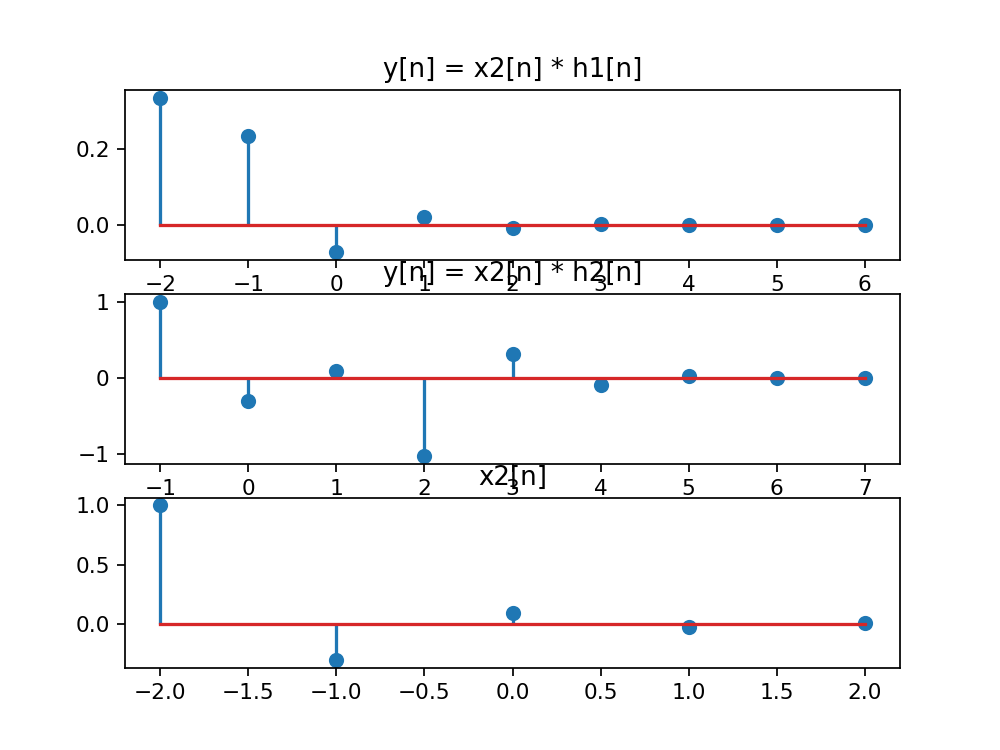

<IPython.core.display.Javascript object>


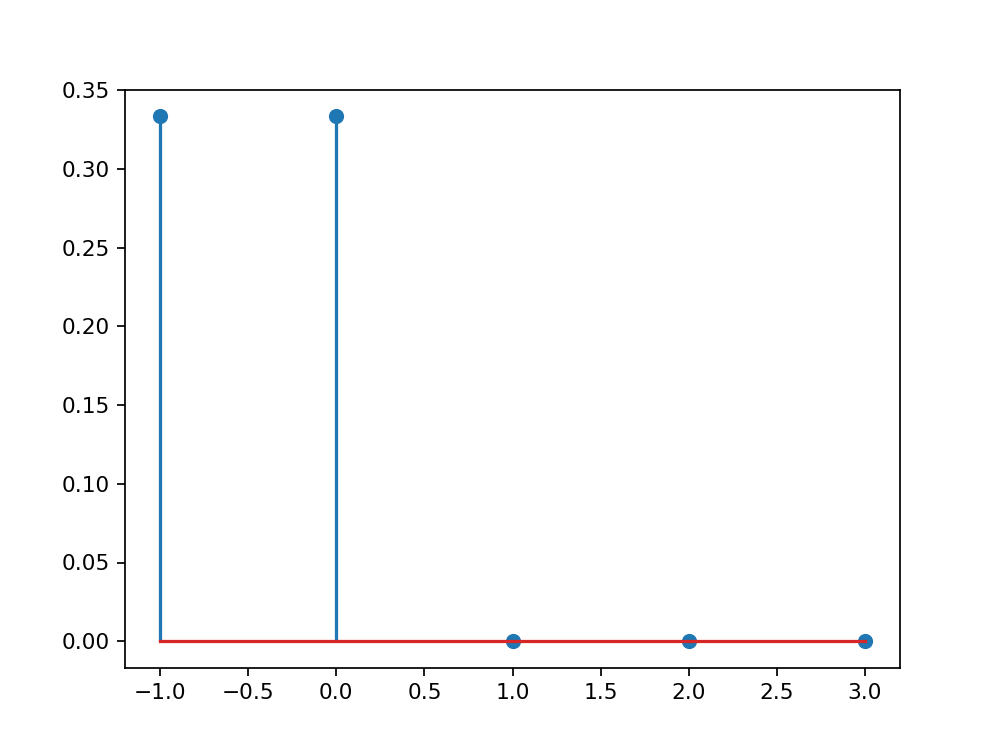

[-2 -1  0  1  2]
[0.33333333 0.33333333 0.         0.         0.        ]


In [168]:
# b) 

n=np.arange(-2,3,1);             # n domainimizi C birim oluşturduk.
h1=np.zeros(len(n),dtype=float); # h1 ve h2 işaretleri
h2=np.zeros(len(n),dtype=float); # için boş yer ayırdık.
x2=np.zeros(len(n),dtype=float); # için boş yer ayırdık.

z=np.zeros(11,dtype=float); # h1 ve h2 işaretleri

for h in range(-5,1):
    z[h] = 5;
    
print('z=', z)


for i in range (-5,len(n)):    
    
    h1[i]=(1/3)*(dirac(i+1)+dirac(i)+dirac(i-1)); # sistem 1 i tanımladık. 
    h2[i]=dirac(i)-dirac(i-3);                    # sistem 2 yi tanımladık.
    x2[i] = pow(-0.3,i)*(u(i)-u(i-5));            # x2 girişini tanımladık. 
    print('h1',h1[i])
    print('h2',h2[i])
    print('x1',x2[i])
    print('i=',i)
   # if 2>n[i]>-2:
    #    h1[i] = (1/3)*1; # sistem 1 i tanımladık.
print('h1_yeni:',h1)     
        
'''h1[1]=(1/3)*(dirac(1+1)+dirac(1)+dirac(1-1)); # sistem 1 i tanımladık. 
h2[1]=dirac(1)-dirac(1-3);                    # sistem 2 yi tanımladık.
x2[1] = pow(-0.3,1)*(u(1)-u(1-5));            # x2 girişini tanımladık

print('h1',h1[1])
print('h2',h2[1])
print('x1',x2[1])'''
    
yB_1 = np.convolve(x2,h1);    # 𝑥2[𝑛]=(-0.3^i)*(u(i)-u(i-5)) girişi için h1 sistemi:
yB_2 = np.convolve(x2,h2);    # 𝑥2[𝑛]=(-0.3^i)*(u(i)-u(i-5)) girişi için h2 sistemi:
print('h1: ',h1)
print('Soru 3. b) şıkkı');
fig, y2x = plt.subplots(3);          # subplot ile 2 grafiği birden çizdirdik.

y2x[0].stem(range(-2,7), yB_1);
#başlangıç bitiş noktalarını konvolüston çıktısına göre tekrar vererek y1'i çizdirdik.
y2x[0].set_title('y[n] = x2[n] * h1[n]');
y2x[1].stem(range(-1,8), yB_2);
#başlangıç bitiş noktalarını konvolüston çıktısına göre tekrar vererek y2'yi çizdirdik.
y2x[1].set_title('y[n] = x2[n] * h2[n]');
y2x[2].stem(n, x2);
y2x[2].set_title('x2[n]');
plt.show();

# 3 grafik beraber çizdirilmiştir.
# en üst grafik: y[n] grafiği y[n] = x2[n] * h1[n] şeklinde hesaplanmıştır.
# ortadaki grafik: y[n] grafiği y[n] = x2[n] * h2[n] şeklinde hesaplanmıştır.
# en alt grafik: x2[n] giriş işaretinin grafiği.
plt.figure(333)
plt.stem(range(-1,4),h1)
print(n)

print(h1)

## Ödev Sonu